In [6]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from random import randint

In [7]:
molecules = pd.read_csv("compound-annotation.csv", sep=",")
molecules = molecules[molecules["SMILES"].notna()]
molecules = molecules.drop_duplicates(subset=['SMILES'], ignore_index=True)
smiles = molecules[["SMILES"]]
smiles

,SMILES
0,CN(C)C(=O)CC1CC2(CCN(CC2)C(=O)N2CCCC2)Oc2ccccc12
1,Cc1c([nH]c2CC(CC(=O)c12)c1ccco1)C(=O)OCC1CCCO1
2,CNC(=O)CN1CCC11CCN(C1)C(=O)c1ccn(C)n1
3,Cn1cc(cn1)N1CCC2(CCN(C2)C(=O)c2ccncc2)C1=O
4,CC(C)CN1CC2CN(CC2C1)S(=O)(=O)c1ccccc1
...,...
47212,[Zn++].CCC(C)[C@H](N)C1=NCC(S1)C(=O)N[C@@H](CC...
47213,CCCNC(=O)[C@@H]1[C@@H](CO)[C@@H]2Cn3c(=O)c(ccc...
47214,C\C=C\c1ccc2[C@H]3N[C@H]([C@H](CO)[C@H]3Cn2c1=...
47215,CCN1[C@@H](C(=O)Nc2ccccc2)[C@H](CO)[C@H]2Cn3c(...


In [8]:
labels_VAE_Kmeans = pd.read_csv("labels_VAE_32_Kmeans.csv")
labels_VAE_Kmeans

,0
0,5
1,0
2,18
3,8
4,17
...,...
47212,9
47213,5
47214,3
47215,3


In [9]:
smiles_labels = pd.merge(labels_VAE_Kmeans, smiles, left_index=True, right_index=True)
Smiles_label = smiles_labels.rename(columns={"0" : "labels_VAE_Kmeans"})
Smiles_label

,labels_VAE_Kmeans,SMILES
0,5,CN(C)C(=O)CC1CC2(CCN(CC2)C(=O)N2CCCC2)Oc2ccccc12
1,0,Cc1c([nH]c2CC(CC(=O)c12)c1ccco1)C(=O)OCC1CCCO1
2,18,CNC(=O)CN1CCC11CCN(C1)C(=O)c1ccn(C)n1
3,8,Cn1cc(cn1)N1CCC2(CCN(C2)C(=O)c2ccncc2)C1=O
4,17,CC(C)CN1CC2CN(CC2C1)S(=O)(=O)c1ccccc1
...,...,...
47212,9,[Zn++].CCC(C)[C@H](N)C1=NCC(S1)C(=O)N[C@@H](CC...
47213,5,CCCNC(=O)[C@@H]1[C@@H](CO)[C@@H]2Cn3c(=O)c(ccc...
47214,3,C\C=C\c1ccc2[C@H]3N[C@H]([C@H](CO)[C@H]3Cn2c1=...
47215,3,CCN1[C@@H](C(=O)Nc2ccccc2)[C@H](CO)[C@H]2Cn3c(...


In [11]:
def draw_molecules(k):
    L = []
    cluster = Smiles_label[Smiles_label["labels_VAE_Kmeans"] == k]
    cluster.reset_index()
    m = [Chem.MolFromSmiles(cluster.iloc[randint(0, cluster.shape[0])]["SMILES"]) for i in range(6)]
    return Draw.MolsToGridImage(m)

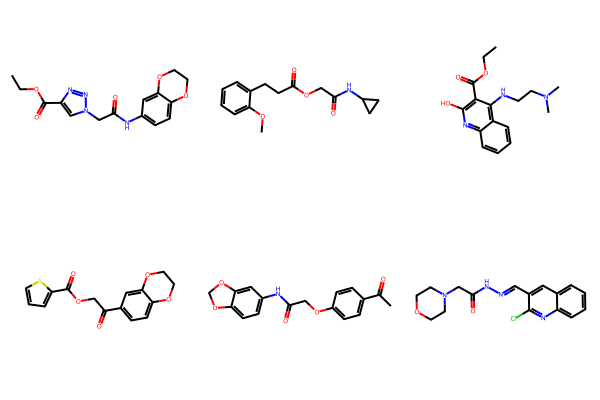

In [12]:
draw_molecules(0)

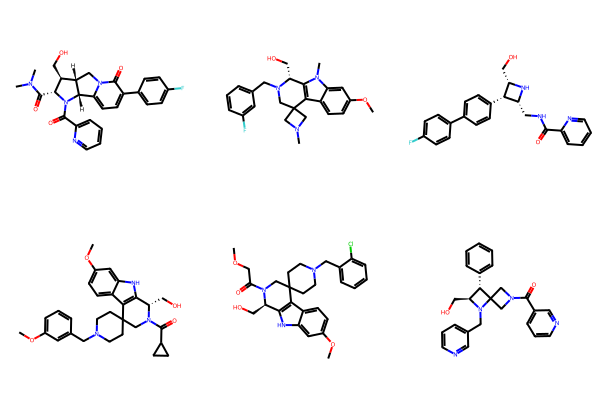

In [13]:
draw_molecules(1)

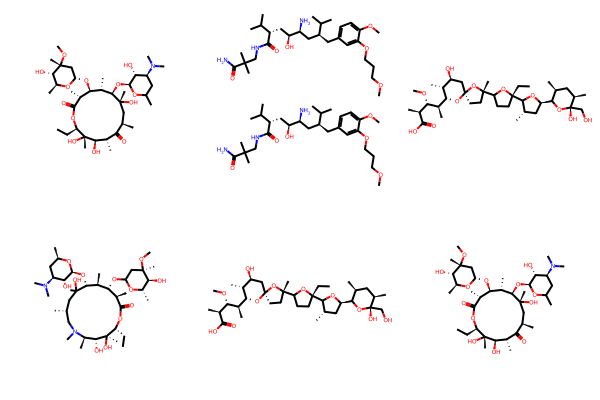

In [15]:
draw_molecules(27)